<a href="https://colab.research.google.com/github/Kalidsa/Projeto-de-Minera-o-de-Textos---CDII/blob/main/Minera%C3%A7%C3%A3o_de_textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo geral -  trabalho de mineração de textos


---



**Aluna: Kalidsa Oliveira**

**Curso: Engenharia de Computação**

 **Disciplina: Ciência de dados II**



---

Este trabalho tem por objetivo desenvolver e avaliar os seus conhecimentos e
habilidades em relação a aplicação das etapas do processo de KDT (Knowledge Discovery
in Texts) estudadas em aula: seleção, limpeza, transformação, mineração e
interpretação de dados. Trata-se, portanto, de um projeto de mineração de textos.

Para tanto, foram coletados 300 comentários de usuários para cada um dos
aplicativos supracitados, totalizando 3.000 comentários. Para cada comentário,
avaliadores humanos o classificaram em uma polaridade (positivo ou negativo) e em
uma emoção de acordo com as emoções básicas de Ekman e Cordaro (2011) que são:

• Felicidade: Representa uma experiência gratificante e positiva para o usuário ao usar o aplicativo;

• Surpresa: Indica uma reação inesperada e positiva do usuário durante a utilização do aplicativo;

• Tristeza: Reflete o sentimento de descontentamento ou a ausência de uma característica desejada no aplicativo, mas mantém uma apreciação geral pelo aplicativo;

• Neutro: Caracteriza a neutralidade na avaliação, com a ausência de manifestações emocionais;

• Medo: Sinaliza a presença de medo ou insegurança por parte do usuário relacionado ao uso do aplicativo;

• Nojo: Descreve uma sensação desagradável causada por uma
característica do aplicativo, prejudicando a experiência do usuário;

• Raiva: Atribuída quando há um nível notável de agressividade na
avaliação do usuário.

#Carregamento dos dados
O código abaixo lê o arquivo CSV avaliacoes_playStore.csv em um DataFrame e exibe as primeiras cinco linhas desse DataFrame.

In [2]:
import pandas as pd
dados_noticias = pd.read_csv('avaliacoes_playStore.csv', sep=',')
dados_noticias.head(10)

,reviewId,app_name,content,sentiment_polarity,sentiment,Unnamed: 5
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,O app da Shopee é razoável. Apesar de ser fáci...,positive,sadness,NaN
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,"O app é bem otimizado, fácil de visualizar os ...",positive,sadness,NaN
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,"O app é muito bom, prático e fácil de entender...",positive,sadness,NaN
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,Aplicativo muito bom. Mas algo que me chateou ...,positive,sadness,NaN
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,"o app é muito bom, porém tenho tido dificuldad...",negative,disgust,NaN
5,2ce2db50-eec3-4cf5-afd6-b153ca01cf0f,Shopee,"É muito bom esse app, porém ele fica travando ...",positive,happiness,NaN
6,404d8ede-bf3e-4652-a410-ec1ad12e40df,Shopee,Tenho gostado bastante do app. Acredito que em...,positive,happiness,NaN
7,0d7c4353-a8f6-467c-abd7-c65b26fd4976,Shopee,"Adoro, tudo que você pensar tem e as promoções...",positive,happiness,NaN
8,5410fc9e-d51f-4f6f-9fdc-01b93eed8750,Shopee,"O app é muito bom,algumas mercadorias são real...",positive,sadness,NaN
9,31458c8f-8f11-496f-b72e-dacc9470a52f,Shopee,Estava com problema inicial de não conseguir e...,negative,anger,NaN


In [3]:
dados_noticias.describe()

,reviewId,app_name,content,sentiment_polarity,sentiment,Unnamed: 5
count,3011,3011,3011,3011,3011,1
unique,3011,10,3011,4,7,1
top,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,O app da Shopee é razoável. Apesar de ser fáci...,#REF!,#REF!,X
freq,1,303,1,2701,2702,1


In [4]:
dados_noticias.loc[0, 'content']

'O app da Shopee é razoável. Apesar de ser fácil de utilizar, apresenta alguns bugs. Por exemplo: Sugestão de palavra errada no campo de pesquisa que acarreta na busca errada. Sugestões de produtos que não têm nada a ver com coisas de nosso interesse. Dificuldade de acesso de alguns jogos ou travamento durante alguma jogada. Falhas para carregar certos anexos para avaliação dos produtos. No geral, são problemas que se pode contornar, pois não ocorrem com tanta frequência.'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Pré-processamento

Remoção dos caracteres que não são latinos e colocando todas as palavras para minúsculas

In [6]:
import regex # trabalhar com expressões regulares
dados_noticias['content'] = dados_noticias['content'].apply(lambda x: regex.sub('[^\p{Latin}]', u' ', str(x)))

dados_noticias.loc[0, 'content']

'O app da Shopee é razoável  Apesar de ser fácil de utilizar  apresenta alguns bugs  Por exemplo  Sugestão de palavra errada no campo de pesquisa que acarreta na busca errada  Sugestões de produtos que não têm nada a ver com coisas de nosso interesse  Dificuldade de acesso de alguns jogos ou travamento durante alguma jogada  Falhas para carregar certos anexos para avaliação dos produtos  No geral  são problemas que se pode contornar  pois não ocorrem com tanta frequência '

In [7]:
dados_noticias['content'] = dados_noticias['content'].apply(lambda x: str(x).lower())

dados_noticias.loc[0, 'content']

'o app da shopee é razoável  apesar de ser fácil de utilizar  apresenta alguns bugs  por exemplo  sugestão de palavra errada no campo de pesquisa que acarreta na busca errada  sugestões de produtos que não têm nada a ver com coisas de nosso interesse  dificuldade de acesso de alguns jogos ou travamento durante alguma jogada  falhas para carregar certos anexos para avaliação dos produtos  no geral  são problemas que se pode contornar  pois não ocorrem com tanta frequência '

Função para remover stopwords mais facilmente no datafreme

In [8]:
import nltk #caso não funcione, adicione a linha
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

def remove_stopwords(texto):
    stops_list = stopwords.words("portuguese")
    word_tokens = word_tokenize(texto)
    texto_sem_stops = [w for w in word_tokens if w not in stops_list]
    return " ".join(texto_sem_stops)

dados_noticias['content'] = dados_noticias['content'].apply(remove_stopwords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
dados_noticias.loc[0, 'content']

'app shopee razoável apesar fácil utilizar apresenta alguns bugs exemplo sugestão palavra errada campo pesquisa acarreta busca errada sugestões produtos têm nada ver coisas interesse dificuldade acesso alguns jogos travamento durante alguma jogada falhas carregar certos anexos avaliação produtos geral problemas pode contornar pois ocorrem tanta frequência'

#Limpeza de dados

verificação de objetos duplicados

In [10]:
dados_noticias.duplicated().sum()

0

Análise e remoção dos registros nulos ou com #REF!

In [11]:
print(dados_noticias.isnull().any())

print()
print(dados_noticias.info())

print()
print((dados_noticias == '#REF!').any())

reviewId              False
app_name              False
content               False
sentiment_polarity    False
sentiment             False
Unnamed: 5             True
dtype: bool

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3011 entries, 0 to 3010
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   reviewId            3011 non-null   object
 1   app_name            3011 non-null   object
 2   content             3011 non-null   object
 3   sentiment_polarity  3011 non-null   object
 4   sentiment           3011 non-null   object
 5   Unnamed: 5          1 non-null      object
dtypes: object(6)
memory usage: 141.3+ KB
None

reviewId              False
app_name              False
content               False
sentiment_polarity     True
sentiment              True
Unnamed: 5            False
dtype: bool


In [12]:
dados_noticias2 = dados_noticias[~dados_noticias.isin(['#REF!']).any(axis=1)]


print((dados_noticias2 == '#REF!').any())

print()
columns_to_drop = [
    'Unnamed: 5'
]

dados_noticias2.drop(columns=columns_to_drop, inplace=True)
print(dados_noticias2.info())

diferenca = dados_noticias.shape[0] - dados_noticias2.shape[0]

print()
print()

print(f'Foram removidos {diferenca} registros')

reviewId              False
app_name              False
content               False
sentiment_polarity    False
sentiment             False
Unnamed: 5            False
dtype: bool

<class 'pandas.core.frame.DataFrame'>
Index: 309 entries, 0 to 2399
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   reviewId            309 non-null    object
 1   app_name            309 non-null    object
 2   content             309 non-null    object
 3   sentiment_polarity  309 non-null    object
 4   sentiment           309 non-null    object
dtypes: object(5)
memory usage: 14.5+ KB
None


Foram removidos 2702 registros


<ipython-input-12-7d8520fd3faa>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_noticias2.drop(columns=columns_to_drop, inplace=True)



# Formatação de dados

Para as colunas de sentiment_polarity e sentiment

sentiment_polarity = [negative, neutral, positive]

sentiment = [ anger, disgust, fear, happiness, neutral, sadness]


---


1.  Transformando a coluna sentiment_polarity, que é ordinal, para númerica utilizando o OrdinalEncoder
2.  Transformando a coluna sentiment, que é nominal, também para númerica utilizando OneHotEncoder




In [13]:
dados_noticias2['sentiment_polarity'].value_counts()

sentiment_polarity
negative    158
positive    147
neutral       4
Name: count, dtype: int64

In [14]:
sent_pol_val = dados_noticias2['sentiment_polarity'].unique()
sent_pol_val

array(['positive', 'negative', 'neutral'], dtype=object)

In [15]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

sent_pol = {'sentiment_polarity':[sent_pol_val[0], sent_pol_val[2], sent_pol_val[1]]}

sent_pol_dtf = pd.DataFrame(sent_pol, columns=['sentiment_polarity'])

sent_pol_dtf

,sentiment_polarity
0,positive
1,neutral
2,negative


In [16]:
sent_pol_dtf['sp_ordinal'] = sent_pol_dtf['sentiment_polarity'].map({val: i for i, val in enumerate(sent_pol_dtf['sentiment_polarity'])})

sent_pol_dtf


,sentiment_polarity,sp_ordinal
0,positive,0
1,neutral,1
2,negative,2


In [17]:
# Create a dictionary mapping 'sentiment_polarity' to 'sp_ordinal'
sent_pol_dict = dict(zip(sent_pol_dtf['sentiment_polarity'], sent_pol_dtf['sp_ordinal']))

# Map the ordinal values to the 'dados_noticias2' DataFrame
dados_noticias2['sp_ordinal'] = dados_noticias2['sentiment_polarity'].map(sent_pol_dict)

columns_to_drop = [
    'sentiment_polarity'
]

dados_noticias2.drop(columns=columns_to_drop, inplace=True)

dados_noticias2.head(5)

<ipython-input-17-6dacd15e0a65>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_noticias2['sp_ordinal'] = dados_noticias2['sentiment_polarity'].map(sent_pol_dict)
<ipython-input-17-6dacd15e0a65>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_noticias2.drop(columns=columns_to_drop, inplace=True)


,reviewId,app_name,content,sentiment,sp_ordinal
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,app shopee razoável apesar fácil utilizar apre...,sadness,0
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,app bem otimizado fácil visualizar produtos pe...,sadness,0
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,app bom prático fácil entender porém alguns ve...,sadness,0
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,aplicativo bom algo chateou bastante fato pesq...,sadness,0
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,app bom porém tido dificuldades pagamento cart...,disgust,2


#Extração da features (representação de texto em formato vetorial)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [ ]:
BoW_matriz = vectorizer.fit_transform(dados_noticias2['content'])

In [ ]:
BOW_dataframe=pd.DataFrame(BoW_matriz.toarray(),columns=vectorizer.get_feature_names_out())
BOW_dataframe

,aba,abaixa,abaixar,abaixaram,abaixei,abaixem,abandonada,aberto,aborrece,aborrecimento,...,ônibus,última,últimas,último,últimos,única,único,únicos,úteis,útil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
306,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#Treinamento e teste

Aqui vamos estimar a performance do classificador utilizando uma subdivisão nos dados. Vamos dividir os dados (BOW_dataframe) em um conjunto de teste e outro treinamento.



In [ ]:
textos_bow = BOW_dataframe
categorias = dados_noticias2['sentiment_polarity']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(textos_bow, categorias, test_size=0.45, stratify=categorias) #45% para teste.

# X_train contém os 55% dos dados - treinamento
# y_train contém os 55% das categorias (atributo alvo) - treinamento

# X_test contém os 45% dos dados - teste
# y_test contém os 45% das categorias - teste

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
predicoes = naive_bayes.predict(X_test) # recebe os 45% dos dados de teste sem as categorias - "escondidas"

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicoes,zero_division=1))

# y_test contém as categorias conhecidas do conjunto de teste usado no método predict().
# predicoes contém as categorias preditas (retornadas) pelo método predict() com base nos dados de X_test.

              precision    recall  f1-score   support

    negative       0.72      0.69      0.71        71
     neutral       1.00      0.00      0.00         2
    positive       0.69      0.75      0.72        67

    accuracy                           0.71       140
   macro avg       0.81      0.48      0.47       140
weighted avg       0.71      0.71      0.70       140



# **Sobre a resposta acima:**

O classification_report mostra várias métricas para avaliar o desempenho do classificador para cada classe:

**Precision:** A precisão é a razão de predições verdadeiras positivas pelo número total de elementos que foram preditos na classe correspondente.

**Recall:** O recall é a razão de predições verdadeiras positivas pelo número total de elementos que realmente pertencem à classe correspondente.

**F1-Score:** O F1-score é a média harmônica da precisão e do recall. É uma métrica que considera tanto a precisão quanto o recall.

**Support:** O suporte é o número de ocorrências reais de cada classe no conjunto de dados.

Precisão e Recall por Classe
# negative:

**Precision:** 0.72 (72% das predições da classe negative estavam corretas)

**Recall:** 0.69 (69% das instâncias reais da classe negative foram corretamente classificadas)

**F1-Score:** 0.71 (média harmônica de precisão e recall)

**Support:** 71 (há 71 instâncias da classe negative no conjunto de teste)


# neutral:

**Precision:** 1.00 (todas as predições foram corretas, mas poucas predições)

**Recall:** 0.00 (nenhuma instância real da classe neutral foi corretamente classificada)

**F1-Score:** 0.00 (devido ao recall ser 0, o F1-score também é 0)

**Support:** 2 (há apenas 2 instâncias da classe neutral no conjunto de teste)

# positive:

**Precision:** 0.69 (69% das predições da classe positive estavam corretas)

**Recall:** 0.75 (75% das instâncias reais da classe positive foram corretamente classificadas)

**F1-Score:** 0.72 (média harmônica de precisão e recall)

**Support:** 67 (há 67 instâncias da classe positive no conjunto de teste)

#Acurácia
**Accuracy:** 0.71 (71% das instâncias no conjunto de teste foram corretamente classificadas).

# Macro Average e Weighted Average
**Macro Average:** Média não ponderada de precisão, recall e F1-score. Considera cada classe igualmente.

**Weighted Average:** Média ponderada de precisão, recall e F1-score. Considera o suporte (quantidade de instâncias) de cada classe.


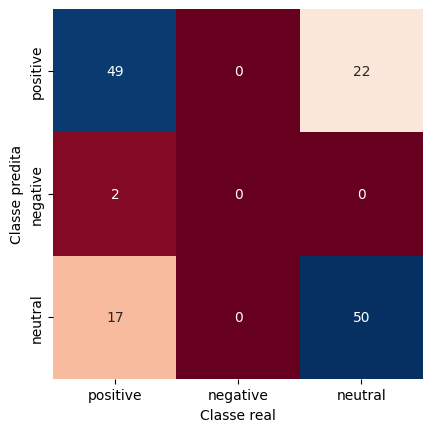

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicoes)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=categorias.unique(),
            yticklabels=categorias.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

In [ ]:
textos_bow = BOW_dataframe
categorias = dados_noticias2['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(textos_bow, categorias, test_size=0.4, stratify=categorias) #45% para teste.
# X_train contém os 60% dos dados - treinamento
# y_train contém os 60% das categorias (atributo alvo) - treinamento

# X_test contém os 40% dos dados - teste
# y_test contém os 40% das categorias - teste
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
predicoes = naive_bayes.predict(X_test) # recebe os 20% dos dados de teste sem as categorias - "escondidas"

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicoes,zero_division=1))


              precision    recall  f1-score   support

       anger       0.44      0.29      0.35        24
     disgust       0.37      0.31      0.34        32
        fear       1.00      0.00      0.00         7
   happiness       0.38      0.21      0.27        14
     neutral       1.00      0.00      0.00         2
     sadness       0.44      0.71      0.54        45

    accuracy                           0.42       124
   macro avg       0.60      0.25      0.25       124
weighted avg       0.45      0.42      0.38       124



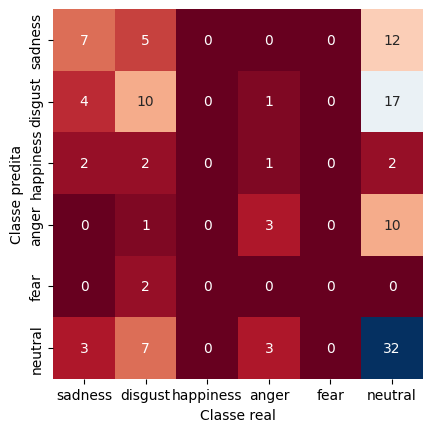

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicoes)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=categorias.unique(),
            yticklabels=categorias.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

#Diagonal Principal: Contém o número de predições corretas para cada classe.
#Fora da Diagonal: Contém o número de predições incorretas, onde a classe real foi confundida com outra.